# 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
!ls "/gdrive/My Drive/bigcontest2019/data/" # address of our files

test  train


In [0]:
import os
import sys
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams['figure.figsize'] = (15, 8)

In [4]:
path = '/gdrive/My Drive/bigcontest2019/data/'
print(os.listdir(path + 'train'),'\n', 
      os.listdir(path + 'test'),'\n', 
      os.listdir(path + '../metrics'),'\n', 
      os.listdir(path + '../scripts'))

['train_payment.csv', 'train_trade.csv', 'train_pledge.csv', 'train_combat.csv', 'train_label.csv', 'train_activity.csv'] 
 ['test1_activity.csv', 'test1_combat.csv', 'test2_activity.csv', 'test1_pledge.csv', 'test2_combat.csv', 'test2_trade.csv', 'test1_trade.csv', 'test1_payment.csv', 'test2_payment.csv', 'test2_pledge.csv'] 
 ['score_function.py', '자체성능평가함수안내.pdf', 'score_function.r', '__pycache__', 'lhh_inference', 'bjw_inference', 'hh_inference', 'nes_inference', 'metrics_test_lhh.ipynb'] 
 ['explortary data', 'model', 'data merge']


In [0]:
def open_csvs(path):

  dflist = os.listdir(path)
  mod = sys.modules[__name__]
  
  for df in tqdm_notebook(dflist):
    tmp = pd.read_csv(path+df) #.fillna('')
    
    setattr(mod, '{}'.format(df.split('.')[0]), tmp)

In [6]:
open_csvs(path+'train/')

# 데이터 확인

In [7]:
train_label.shape

(40000, 3)

In [8]:
train_label.head()

,acc_id,survival_time,amount_spent
0,27835,64,0.002559
1,12351,64,0.120154
2,125437,55,0.182593
3,104483,64,0.016241
4,4704,20,0.226396


변수 | 변수 설명
-- | --
acc_id | 유저 아이디
survival_time | 생존 기간(일)
amount_spent | 일별 평균 결제 금액

In [9]:
train_activity.shape

(1601834, 17)

In [10]:
train_activity.head()

,day,acc_id,char_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
0,1,75001,397380,aa,1.441844,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.0,1.10514,0.034006,0.0
1,1,75001,216231,aa,0.283219,2.247978,0.047085,0.000000,0.000000,0,0.000000,0.000000,0.0,0.0,0.00000,-0.013963,0.0
2,1,75711,308769,aa,1.036910,2.956638,0.321821,0.166593,0.003470,1,0.245883,0.247337,0.0,0.0,0.00000,-0.001987,0.0
3,1,72230,387177,aa,0.229384,4.042102,0.099147,0.000000,0.001735,0,0.000000,0.000000,0.0,0.0,0.00000,-0.028884,0.0
4,1,34253,339862,aa,1.088405,0.596802,0.003377,0.000000,0.000000,0,0.000000,0.000000,0.0,0.0,0.00000,0.011777,0.0


변수 | 변수 설명
------ | --------
day | 날짜
acc_id | 유저 아이디
char_id | 캐릭터 아이디
server | 캐릭터 서버
playtime | 일일 플레이시간
npc_kill npc | npc를 죽인 횟수
solo_exp | 솔로 사냥 획득 경험치
party_exp | 파티 사냥 획득 경험치
quest_exp | 퀘스트 획득 경험치
boss_monster | 보스 몬스터 타격 여부 (0=미타격 ,1= 타격)
death | 캐릭터 사망 횟수
revive | 부활 횟수
exp_recovery | 경험치 복구 횟수(성당)
fishing | 일일 낚시 시간
private_shop | 일일 개인상점 운영 시간
game_money_change | 일일 아데나 변동량
enchant_count | 7 레벨 이상 아이템 인첸트 시도 횟수


In [11]:
train_payment.shape

(66432, 3)

In [12]:
train_payment.head()

,day,acc_id,amount_spent
0,18,27835,0.826123
1,23,27835,0.011735
2,27,27835,0.035204
3,17,12351,0.528062
4,11,125437,0.633674


변수 | 변수 설명
------ | --------
day | 날짜
acc_id | 유저 아이디
amount_spent | 결제 금액

In [13]:
train_trade.shape

(1849325, 11)

In [14]:
train_trade.head()

,day,time,type,server,source_acc_id,source_char_id,target_acc_id,target_char_id,item_type,item_amount,item_price
0,7,21:13:05,1,ag,11439,385109,48152,34247,enchant_scroll,4.793968e-08,NaN
1,2,15:33:00,1,al,22220,259705,43228,379826,enchant_scroll,4.314571e-06,NaN
2,1,14:24:53,1,al,18212,164230,38145,34209,accessory,7.190952e-08,NaN
3,7,23:13:43,1,au,121622,49839,71226,281334,adena,9.587936e-03,NaN
4,2,12:43:33,0,bd,14421,344503,65220,210558,etc,1.198492e-07,0.000639


변수 | 변수 설명 | etc
------ | -------- | --
day | 거래 발생 일
time | 거래 발생 시간 | 00:00:00 ~ 23:59:59
type | 거래 구분 | 교환창 = 1, 개인상점 = 0
server | 거래 발생 서버
source_acc_id | 주는/판매 유저 아이디
source_char_id | 주는/판매 캐릭터 아이디
target_acc_id | 받는/구매 유저 아이디
target_char_id | 받는/구매 캐릭터 아이디
item_type | 아이템 종류| weapon (무기), armor (방어구), accessory(액세서리), adena (아데나), spell (스킬북), enchant_scroll (강화주문서), etc (기타)
item_amount | 거래 아이템 수량
item_price | 거래 가격 | 교환창 거래 (Type=1)일 경우 NA

In [15]:
train_pledge.shape

(1083384, 15)

In [16]:
train_pledge.head()

,day,acc_id,char_id,server,pledge_id,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,etc_cnt,combat_play_time,non_combat_play_time
0,1,106660,345122,aa,381,0.036089,0.036089,0.0,0.0,0.0,0.0,0.000000,0.007078,0.027568,0.000000
1,1,46383,161773,aa,10892,0.036089,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.006139
2,1,18495,321373,aa,13705,0.036089,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000347
3,1,118293,366707,aa,2982,0.036089,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.001042
4,1,50421,158063,aa,27104,0.216536,0.072179,0.0,0.0,0.0,0.0,0.098883,0.056626,0.083978,0.000000


변수 | 변수 설명
------ | --------
day | 날짜
acc_id | 유저 아이디
char_id | 캐릭터 아이디
server | 캐릭터 서버
pledge_id | 혈맹 아이디
play_char_cnt | 접속 혈맹 캐릭터 수
combat_char_cnt | 전투 참여 혈맹 캐릭터 수
pledge_combat_cnt | 혈맹 전투 횟수의 합
random_attacker_cnt | 무작위공격(막피)을 행한 전투 횟수의 합
random_defender_cnt | 무작위공격(막피)으로 피해받은 전투 횟수의 합
same_pledge_cnt | 동일 혈맹 전투 횟수의 합
temp_cnt | 단발성 전투 횟수의 합
etc_cnt | 기타 전투 횟수의 합
combat_play_time | 전투 캐릭터 플레이 시간의 합
non_combat_play_time | 非전투 캐릭터 플레이 시간의 합

In [17]:
train_combat.shape

(1574671, 13)

In [18]:
train_combat.head()

,day,acc_id,char_id,server,class,level,pledge_cnt,random_attacker_cnt,random_defender_cnt,temp_cnt,same_pledge_cnt,etc_cnt,num_opponent
0,1,13809,54861,ap,2,13,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,1,13809,256332,ap,2,13,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,1,13809,307293,ap,3,14,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,1,13809,374964,ap,7,16,0.0,0.0,0.0,0.0,0.0,0.112612,0.098129
4,1,13809,117917,ap,2,11,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


변수 | 변수 설명 | etc
-- | -- | --
day | 날짜
acc_id | 유저 아이디
char_id | 캐릭터 아이디
server | 캐릭터 서버
class | 직업 | 0 군주, 1 기사, 2 요정, 3 마법사, 4 다크엘프, 5 용기사, 6 환술사, 7 전사
level | 레벨
pledge_cnt | 혈맹 전투 횟수
random_attacker_cnt | 무작위 공격을 행한 전투 횟수
random_defender_cnt | 무작위 공격자로부터 공격을 받은 전투 횟수
temp_cnt | 단발성 전투 횟수
same_pledge_cnt | 동일 혈맹 전투 횟수
etc_cnt | 기타 전투 횟수
num_opponent | 전투 상대 캐릭터 수

# 데이터 EDA

## train_label

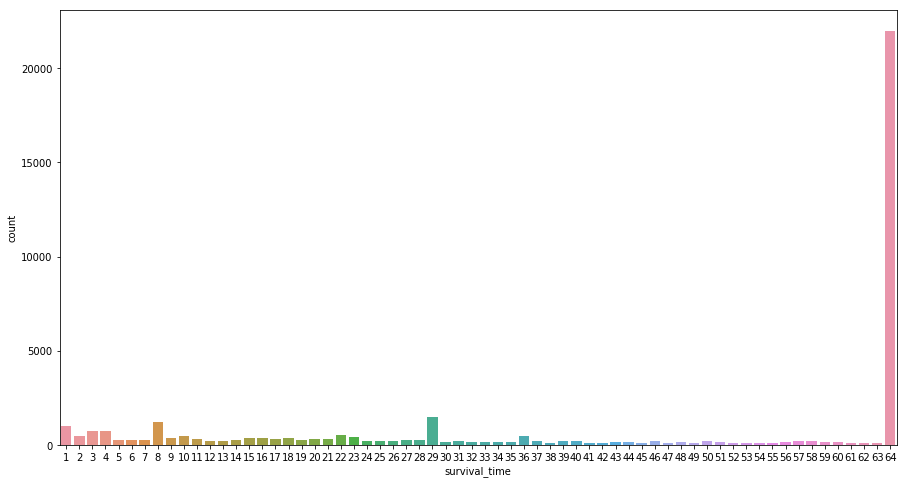

In [19]:
sns.countplot(x='survival_time', data = train_label)
plt.show()

In [20]:
train_label['survive'] = train_label.survival_time.apply(lambda x: 'long_survive' if x >= 64 else 'short_survive')
train_label.head()

,acc_id,survival_time,amount_spent,survive
0,27835,64,0.002559,long_survive
1,12351,64,0.120154,long_survive
2,125437,55,0.182593,short_survive
3,104483,64,0.016241,long_survive
4,4704,20,0.226396,short_survive


In [21]:
train_label.survive.value_counts()

long_survive     21996
short_survive    18004
Name: survive, dtype: int64

- 64일 생존자 (확실한 생존자)가 압도적으로 많다
- 64일 생존과 나머지로 나눴을 때 64일 생존 21996명, 나머지 18004명

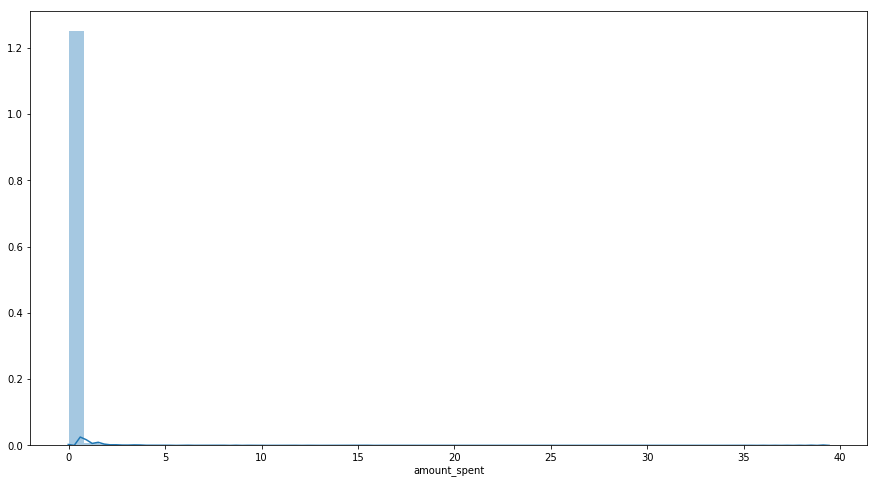

In [22]:
sns.distplot(train_label['amount_spent'])# np.log1p
plt.show()

In [23]:
train_label.amount_spent[train_label.amount_spent==0].count()

16438

In [24]:
train_label.amount_spent[train_label.amount_spent!=0].count()

23562

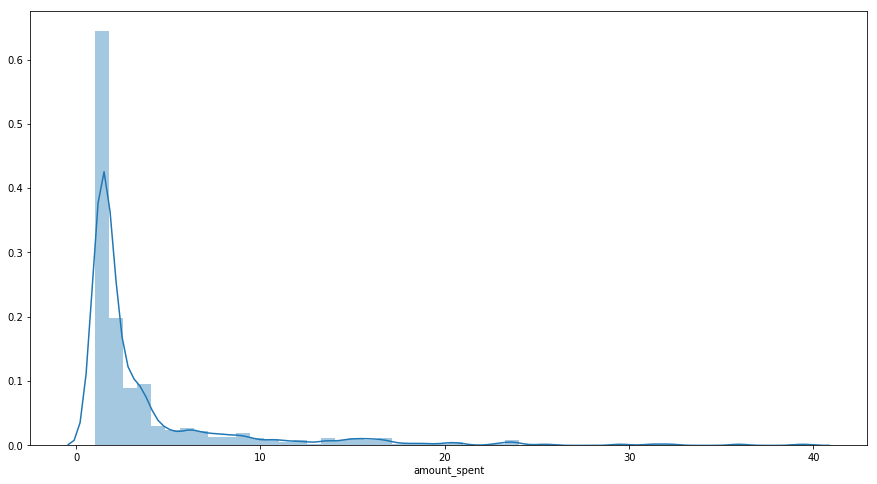

In [0]:
sns.distplot(train_label.amount_spent[train_label.amount_spent >= 1])
plt.show()

- amount_spent는 0이 16438명이나 되고, 최소한 1원이라도 사용한 사람은 23562명이다
- 그리고 사용 액수는 exponetial하게 감소하는 추세이기 때문에 대부분 0원에 있다
- 돈을 아예 안 쓴 사람들을 별도로 떼어내서 특징이 될 요소들을 찾으면, 그걸로 집단을 둘로 나눌 수 있을 것 같다

## train_activity

In [0]:
activity_summary_label = pd.merge(train_activity.drop(['char_id', 'server'], axis=1).groupby(['acc_id', 'day']).sum().reset_index(), train_label, on = 'acc_id', how='left')
activity_summary_label.head()

,acc_id,day,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count,survival_time,amount_spent,survive
0,2,1,2.703457,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2.462447,1.024810,0.0,64,0.0,long_survive
1,2,2,3.363522,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.149118,-1.044201,0.0,64,0.0,long_survive
2,2,3,3.370544,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.183447,0.451317,0.0,64,0.0,long_survive
3,2,4,3.370544,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.131992,-0.007230,0.0,64,0.0,long_survive
4,2,5,3.370544,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,3.135698,0.015398,0.0,64,0.0,long_survive


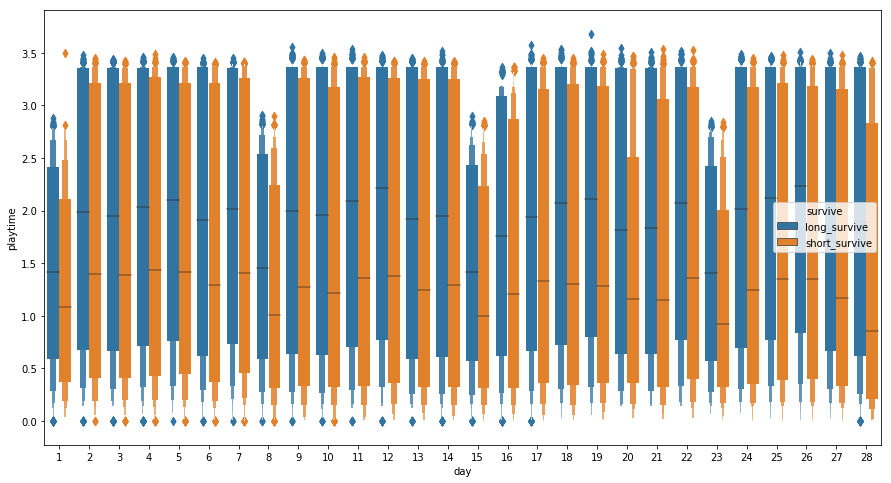

In [0]:
sns.boxenplot(x='day', y= 'playtime', hue='survive', data=activity_summary_label)
plt.show()

- 7일 주기로 playtime이 줄어드는데 이유가 뭘까?
- label에서 64일 이상 접속한 집단이  playtime 조금씩 더 길다
- day fsa

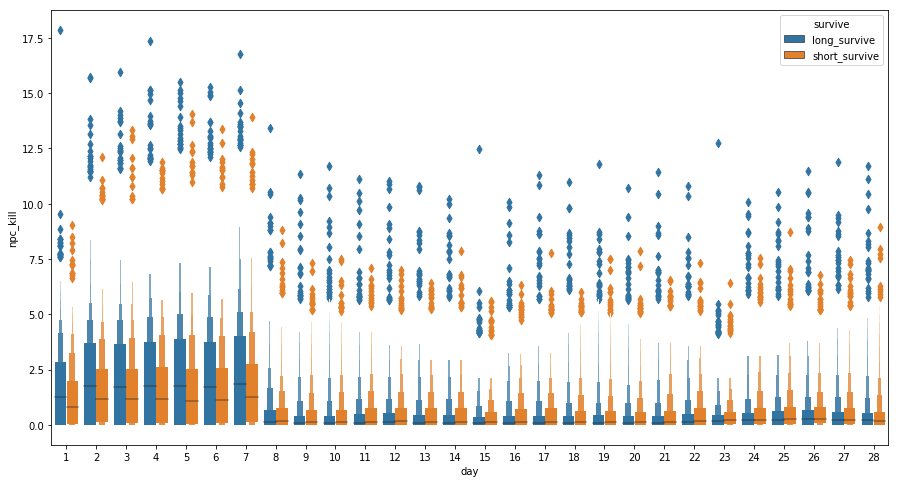

In [0]:
sns.boxenplot(x='day', y= 'npc_kill', hue='survive', data=activity_summary_label)
plt.show()

- npc를 처음 6일 정도 많이 잡았는데 이벤트가 있었던건가?
- npc_kill도 64일 이상 접속자가 더 많이 하는 듯? (확실 X)

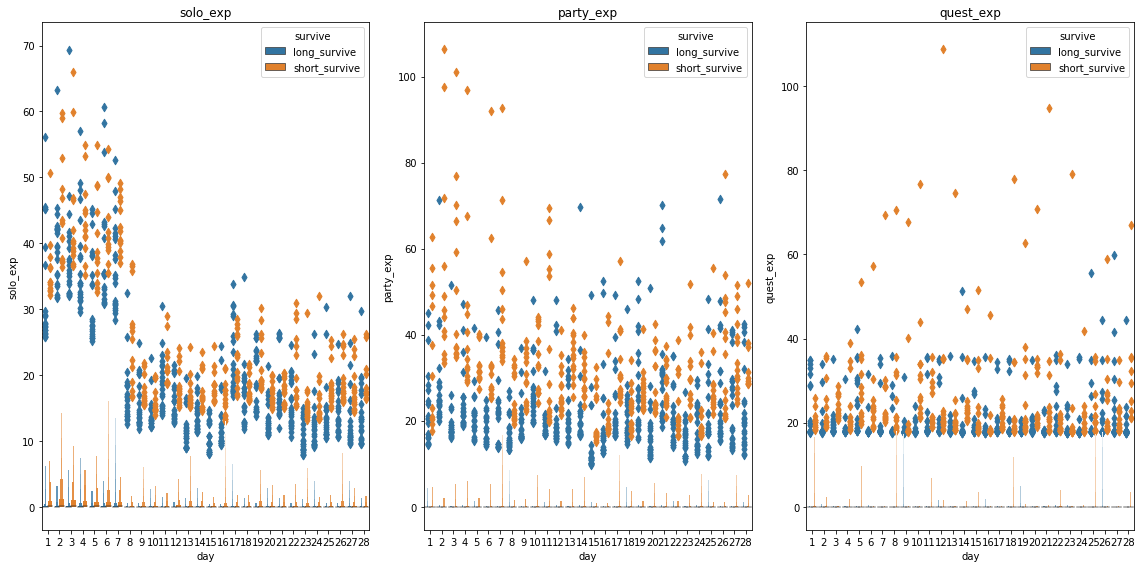

In [0]:
plt.figure(figsize = (16, 8))

plt.subplot(1,3,1)
sns.boxenplot(x='day', y= 'solo_exp', hue='survive', data=activity_summary_label)
plt.title('solo_exp')

plt.subplot(1,3,2)
sns.boxenplot(x='day', y= 'party_exp', hue='survive', data=activity_summary_label)
plt.title('party_exp')

plt.subplot(1,3,3)
sns.boxenplot(x='day', y= 'quest_exp', hue='survive', data=activity_summary_label)
plt.title('quest_exp')

plt.tight_layout()
plt.show()

- solo_exp만 보면 처음 6일 정도 무슨 이벤트가 있었던 듯
- 파티 통한 경험치 획득이 많은 편 > 퀘스트 > 솔로

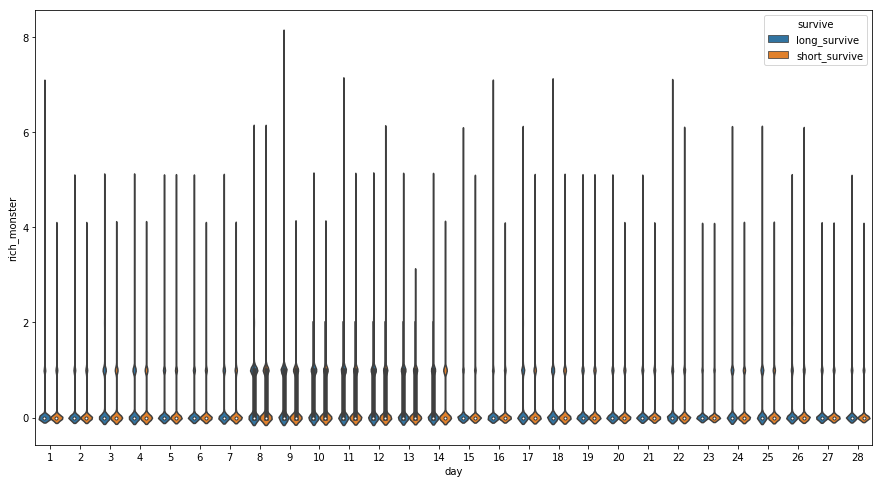

In [0]:
sns.violinplot(x='day', y= 'rich_monster', hue='survive', data=activity_summary_label)
plt.show()

- 대게 rich monster는 안 잡는다. 8~14까지는 조금 잡았다.
- 64일 이상 접속한 그룹이 아닌 그룹보다는 더 많이 사냥하는 경향성 있음

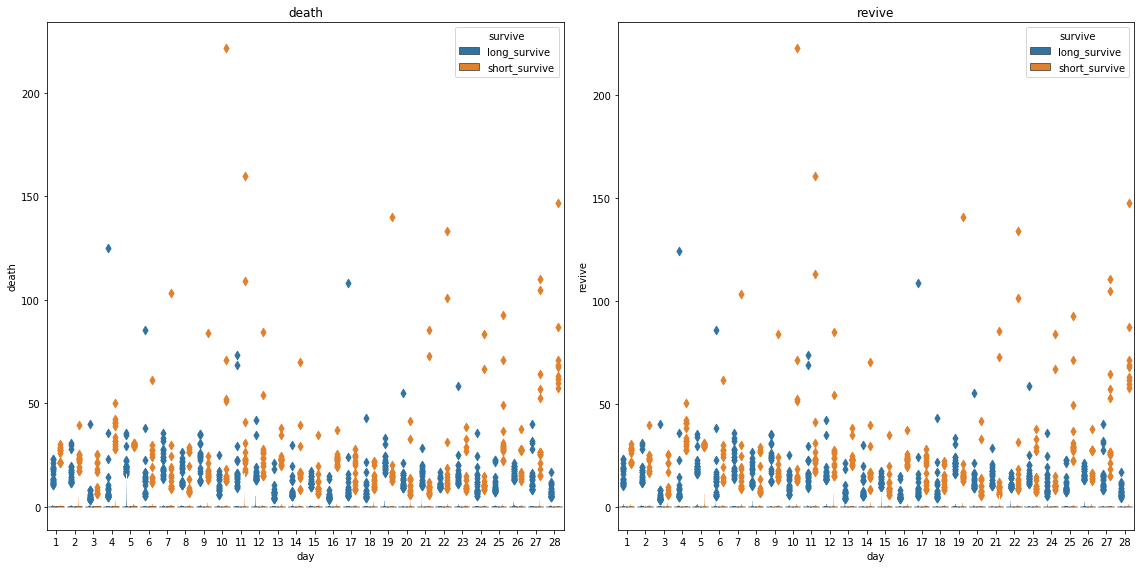

In [0]:
plt.figure(figsize = (16, 8))

plt.subplot(1,2,1)
sns.boxenplot(x='day', y= 'death', hue='survive', data=activity_summary_label)
plt.title('death')

plt.subplot(1,2,2)
sns.boxenplot(x='day', y= 'revive', hue='survive', data=activity_summary_label)
plt.title('revive')

plt.tight_layout()
plt.show()

In [0]:
pd.DataFrame(np.where(activity_summary_label['death'] == activity_summary_label['revive'], 'd_to_r', 'no_r'), columns=['dr']).dr.value_counts()

d_to_r    781163
no_r      168195
Name: dr, dtype: int64

- 죽으면 대체로 부활한다 (781163/168195 = 4.644388953298255)

In [0]:
df = pd.DataFrame({'day':activity_summary_label['day'], 'dr':np.where(activity_summary_label['death'] == activity_summary_label['revive'], 'd_to_r', 'no_r'), 'survive':activity_summary_label['survive']})

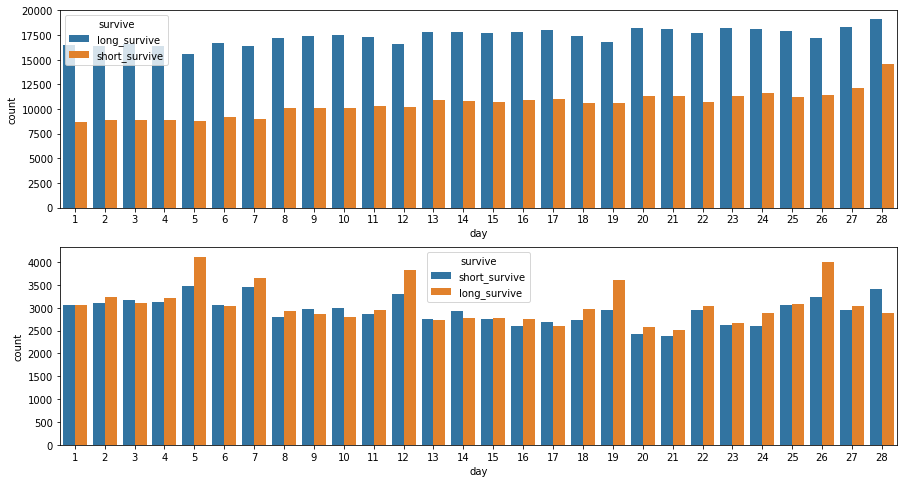

In [0]:
plt.subplot(2,1,1)
sns.countplot(x='day', hue='survive', data=df[df['dr'] == 'd_to_r'])

plt.subplot(2,1,2)
sns.countplot(x='day', hue='survive', data=df[df['dr'] == 'no_r'])
plt.show()

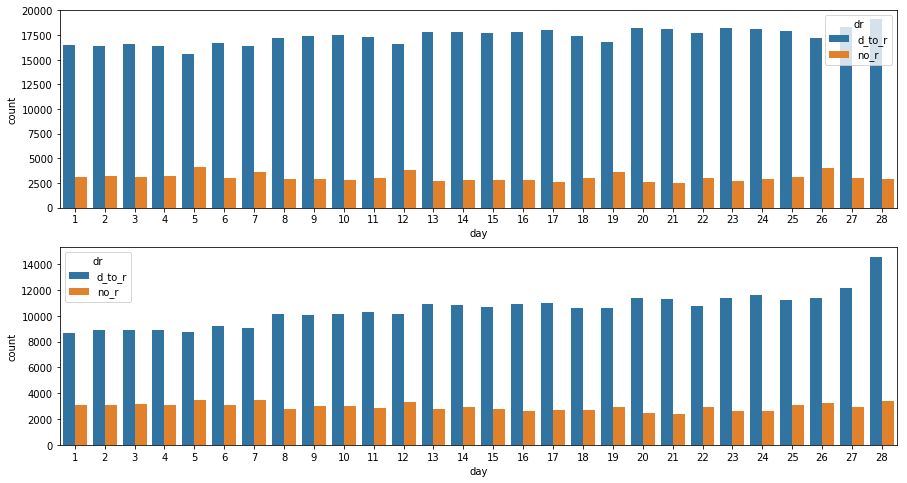

In [0]:
plt.subplot(2,1,1)
sns.countplot(x='day', hue='dr', data=df[df['survive'] == 'long_survive'])

plt.subplot(2,1,2)
sns.countplot(x='day', hue='dr', data=df[df['survive'] == 'short_survive'])
plt.show()

- 부활 잘 하는 사람들 중에는 이탈 비율이 낮지만, 부활 안 하는 사람들은 이탈자 비율이 미이탈자와 비슷하다

# 모델 학습

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
Xyy = pd.merge(train_activity.drop(['char_id', 'server', 'day'], axis=1).groupby(['acc_id']).sum().reset_index(), train_label.drop(['survive'], axis=1), on='acc_id', how='left')

In [0]:
Xyy.head()

,acc_id,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count,survival_time,amount_spent
0,2,91.533663,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,84.900753,-0.008746,0.0,64,0.000000
1,5,6.116132,3.236452,2.155434,0.695285,0.111055,9,0.245883,0.247337,0.0,3.442909,0.000000,0.145146,0.0,60,0.000000
2,8,18.797802,31.172609,31.489136,0.000000,1.561055,2,91.960416,92.504000,0.0,4.807823,0.000000,0.020353,0.0,64,0.020310
3,17,28.464708,30.456852,9.255848,8.823094,2.322365,21,1.721184,1.731358,0.0,13.990954,0.000000,-0.027696,0.0,64,0.070642
4,20,25.588043,34.100184,0.274902,0.080060,0.083483,8,0.983534,0.989348,0.0,4.295766,2.917510,-0.370192,0.0,64,0.052137


In [0]:
Xyy.shape

(40000, 16)

In [0]:
ids = Xyy['acc_id']
ids.head()

0     2
1     5
2     8
3    17
4    20
Name: acc_id, dtype: int64

In [0]:
X = Xyy.drop(['acc_id', 'survival_time', 'amount_spent'], axis=1)
X.columns

Index(['playtime', 'npc_kill', 'solo_exp', 'party_exp', 'quest_exp',
       'rich_monster', 'death', 'revive', 'exp_recovery', 'fishing',
       'private_shop', 'game_money_change', 'enchant_count'],
      dtype='object')

In [0]:
y1 = Xyy['survival_time']
y1.head()

0    64
1    60
2    64
3    64
4    64
Name: survival_time, dtype: int64

In [0]:
y2 = Xyy['amount_spent']
y2.head()

0    0.000000
1    0.000000
2    0.020310
3    0.070642
4    0.052137
Name: amount_spent, dtype: float64

In [0]:
X_train, X_val, y_train_t, y_val_t, y_train_m, y_val_m, id_train, id_val = train_test_split(X, y1, y2, ids, test_size=0.33, random_state=42)

In [0]:
X_train.shape, y_train_t.shape, y_train_m.shape, id_train.shape, X_val.shape, y_val_t.shape, y_val_m.shape, id_val.shape

((26800, 13),
 (26800,),
 (26800,),
 (26800,),
 (13200, 13),
 (13200,),
 (13200,),
 (13200,))

## 리니어 리그레션

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
reg_t = LinearRegression().fit(X_train, y_train_t)

In [0]:
pred_t = reg_t.predict(X_val)

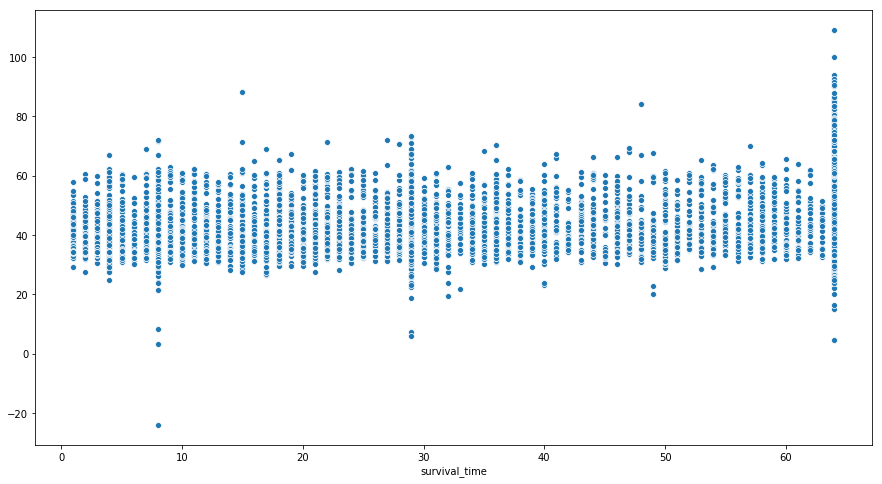

In [0]:
sns.scatterplot(x=y_val_t, y=pred_t)
plt.show()

In [0]:
reg_m = LinearRegression().fit(X_train, y_train_m)

In [0]:
pred_m = reg_m.predict(X_val)

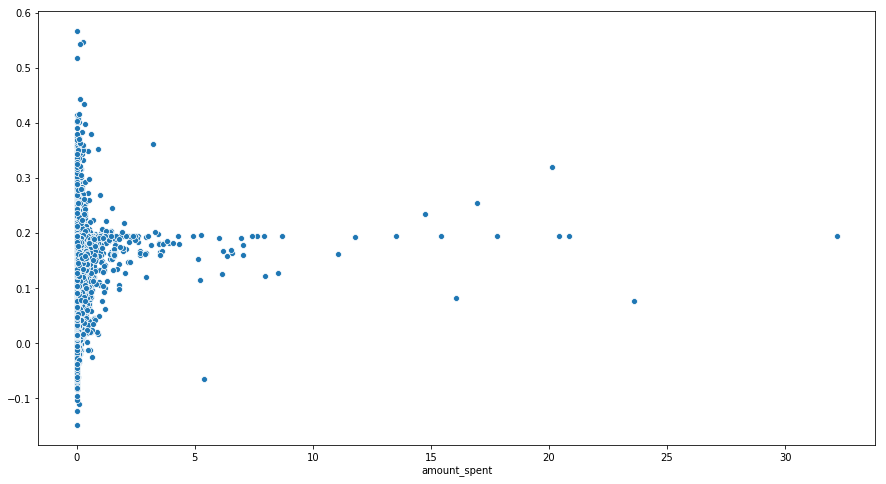

In [0]:
sns.scatterplot(x=y_val_m, y=pred_m)
plt.show()

In [0]:
from score_function import score_function

ModuleNotFoundError: ignored

In [0]:
# -*- coding: utf-8 -*-

# ------------------------------------------------------------------------ #
# INPUT
#    predicted_label : 예측 답안지 파일 경로 
#    actual_label    : 실제 답안지 파일 경로
#
# OUTPUT             : 유저 기대이익 총합 
#
#
# - 예측 답안지를 실제 답안과 비교하여 유저 기대이익 총합을 계산하는 함수
# - 함수의 계산방식은 문제 설명서에 기술된 기대이익 산출식과 동일
# ------------------------------------------------------------------------ #

#필요한 모듈 import
import pandas as pd
import numpy as np
import sys

def score_function(predict_label, actual_label):
    
    predict = pd.read_csv(predict_label, engine='python') # 예측 답안 파일 불러오기
    actual = pd.read_csv(actual_label,engine='python') # 실제 답안 파일 불러오기 

    predict.acc_id = predict.acc_id.astype('int')
    predict = predict.sort_values(by =['acc_id'], axis = 0) # 예측 답안을 acc_id 기준으로 정렬 
    predict = predict.reset_index(drop = True)
    actual.acc_id = actual.acc_id.astype('int')
    actual = actual.sort_values(by =['acc_id'], axis = 0) # 실제 답안을 acc_id 기준으로 정렬
    actual =actual.reset_index(drop=True)
    
    if predict.acc_id.equals(actual.acc_id) == False:
        print('acc_id of predicted and actual label does not match')
        sys.exit() # 예측 답안의 acc_id와 실제 답안의 acc_id가 다른 경우 에러처리 
    else:
            
        S, alpha, L, sigma = 30, 0.01, 0.1, 15  
        cost, gamma, add_rev = 0,0,0 
        profit_result = []
        survival_time_pred = list(predict.survival_time)
        amount_spent_pred = list(predict.amount_spent)
        survival_time_actual = list(actual.survival_time)
        amount_spent_actual = list(actual.amount_spent)    
        for i in range(len(survival_time_pred)):
            if survival_time_pred[i] == 64 :                 
                cost = 0
                optimal_cost = 0
            else:
                cost = alpha * S * amount_spent_pred[i]                    #비용 계산
                optimal_cost = alpha * S * amount_spent_actual[i]          #적정비용 계산 
            
            if optimal_cost == 0:
                gamma = 0
            elif cost / optimal_cost < L:
                gamma = 0
            elif cost / optimal_cost >= 1:
                gamma = 1
            else:
                gamma = (cost)/((1-L)*optimal_cost) - L/(1-L)              #반응률 계산
            
            if survival_time_pred[i] == 64 or survival_time_actual[i] == 64:
                T_k = 0
            else:
                T_k = S * np.exp(-((survival_time_pred[i] - survival_time_actual[i])**2)/(2*(sigma)**2))    #추가 생존기간 계산
                
            add_rev = T_k * amount_spent_actual[i]                         #잔존가치 계산
    
           
            profit = gamma * add_rev - cost                                #유저별 기대이익 계산
            profit_result.append(profit)
            
        score = sum(profit_result)                                         #기대이익 총합 계산
    return score



In [0]:
valid_df = pd.DataFrame({'acc_id':id_val, 'survival_time':y_val_t, 'amount_spent':y_val_m})
valid_df.head()

,acc_id,survival_time,amount_spent
32823,106945,64,0.023099
16298,53353,64,0.185087
28505,92778,64,0.057551
6689,22031,64,0.000000
26893,87505,64,0.000000


In [0]:
predict_df = pd.DataFrame({'acc_id':id_val, 'survival_time':pred_t, 'amount_spent':pred_m})
predict_df.head()

,acc_id,survival_time,amount_spent
32823,106945,59.517240,0.185459
16298,53353,64.682654,0.095818
28505,92778,44.286335,0.187778
6689,22031,48.379851,0.166181
26893,87505,60.407543,0.015475


In [0]:
output_path = '/gdrive/My Drive/bigcontest2019/metrics/hh_inference/'

In [0]:
valid_df.iloc[:, :3].to_csv(output_path+'true.csv', index=False)
predict_df.to_csv(output_path+'predict.csv', index=False)

In [0]:
score_function(output_path+'predict.csv', output_path+'true.csv')

2434.1983680683215

- 별 과정없이 activity 컬럼 합 정보로 linear regression 학습했을 때 2434.1983680683215
